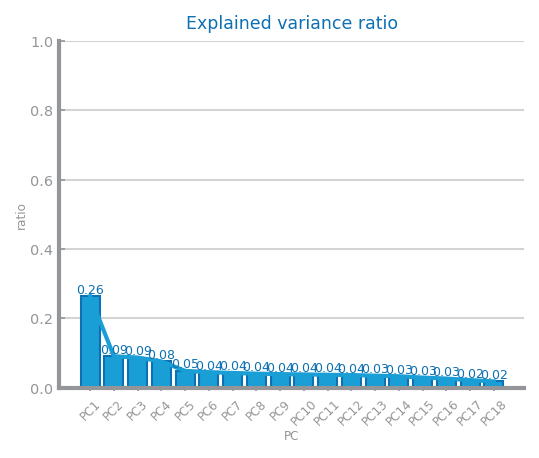

In [12]:
from pandas import read_csv, DataFrame
from matplotlib.pyplot import figure, show, gca
from dslabs_functions import plot_multi_scatters_chart
from sklearn.decomposition import PCA
from pandas import Series, Index
from matplotlib.axes import Axes
from dslabs_functions import plot_bar_chart

data: DataFrame = read_csv("../dataset/set_2_train_redundant.csv")
target = "CLASS"


target_data: Series = data.pop(target)
index: Index = data.index
pca = PCA()
pca.fit(data)

xvalues: list[str] = [f"PC{i+1}" for i in range(len(pca.components_))]
figure()
ax: Axes = gca()
plot_bar_chart(
    xvalues,
    pca.explained_variance_ratio_,
    ax=ax,
    title="Explained variance ratio",
    xlabel="PC",
    ylabel="ratio",
    percentage=True,
)
ax.plot(pca.explained_variance_ratio_)
show()

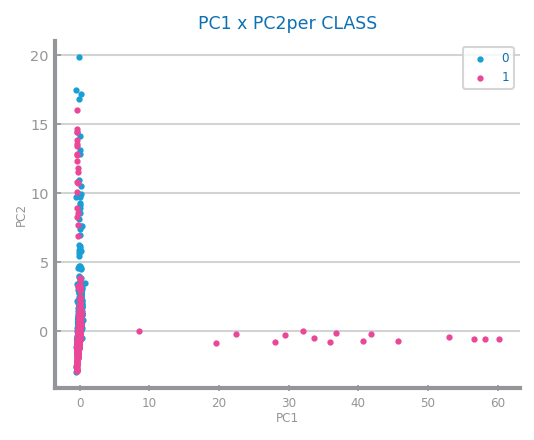

In [25]:
from pandas import concat


transf: PCA = pca.transform(data)
data_trsf = DataFrame(transf, columns=xvalues, index=index)
data_trsf: DataFrame = concat([data_trsf, target_data], axis=1)

figure()
plot_multi_scatters_chart(data_trsf, "PC1", "PC2", target)
show()